<a href="https://colab.research.google.com/github/vincimech010233/python/blob/master/ImagenFractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install requests

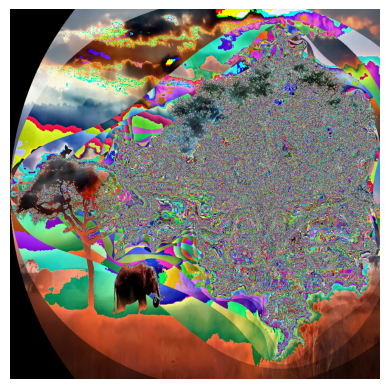

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    return (np.array([[mandelbrot(complex(r, i), max_iter) for r in r1] for i in r2]), r1, r2)

# Configuración del fractal
fractal, xs, ys = mandelbrot_set(-2.0, 0.5, -1.25, 1.25, 1000, 1000, 80)

# Descargar imagen en línea
# url = 'URL_IMAGEN'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((len(xs), len(ys))) # Redimensionar para coincidir con el fractal
img_data = np.array(img)

# Aplicar el fractal a la imagen
modified_img_data = np.mod(img_data * fractal[:, :, np.newaxis], 255).astype(np.uint8)

# Mostrar la imagen modificada
plt.imshow(modified_img_data)
plt.axis('off')
plt.show()
